<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Image_Classification_using_Convolutional_Neural_Networks_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program builds and trains a Convolutional Neural Network (CNN) on the CIFAR-10 image classification dataset using TensorFlow Keras.

1. Import Required Libraries
tensorflow is used for building and training the neural network.

keras.layers and keras.models provide layers and architecture tools.

cifar10 is a dataset of 60,000 32×32 color images in 10 classes (e.g., airplane, car, bird, etc.).

matplotlib.pyplot is typically used for visualizations.

2. Load the CIFAR-10 Dataset
Loads training and test images and labels.

x_train: 50,000 training images

x_test: 10,000 test images

Labels are integers from 0 to 9 representing class categories

3. Normalize the Image Pixel Values
Pixel values range from 0 to 255. This scales them down to 0–1.

Normalization helps the model learn faster and better.

4. Build the CNN Model
Conv2D: Extracts features from the image using filters.

MaxPooling2D: Reduces the image size, keeping important features.

Flatten: Converts the 2D feature maps to a 1D vector.

Dense: Fully connected layers.

Final layer has 10 units (one per class), without activation

5. Compile the Model
Adam optimizer is used for learning weights.

SparseCategoricalCrossentropy is used as loss function for multi-class classification.

from_logits=True because the final layer does not have a softmax activation yet.

6. Train the Model
The model is trained on training data (x_train, y_train) for 10 epochs.

During training, it also evaluates on test data to check validation accuracy.

7. Evaluate the Model
After training, the model is evaluated on test data.

It prints out the final accuracy on the unseen test set.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3407 - loss: 1.7732 - val_accuracy: 0.5461 - val_loss: 1.2660
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5728 - loss: 1.2024 - val_accuracy: 0.6148 - val_loss: 1.0881
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6390 - loss: 1.0219 - val_accuracy: 0.6582 - val_loss: 0.9731
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6830 - loss: 0.9016 - val_accuracy: 0.6680 - val_loss: 0.9546
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7080 - loss: 0.8302 - val_accuracy: 0.6931 - val_loss: 0.8980
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7281 - loss: 0.7705 - val_accuracy: 0.6913 - val_loss: 0.8972
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7480 - loss: 0.7163 - val_accuracy: 0.7052 - val_loss: 0.8723
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7642 - loss: 0.6648

Transfer Learning Concept

Instead of training a CNN from scratch, we're using a pre-trained model (VGG16) that has already learned useful features from a large dataset (ImageNet). We then add new layers to adapt it to our own classification task (CIFAR-10 here).

1. Import Required Modules
VGG16: A popular CNN architecture trained on ImageNet.

We’ll use it here without its top (classification) layers.

2. Load VGG16 Without the Top Layer
weights='imagenet': Loads pretrained weights.

include_top=False: Removes the fully connected layers from the original model.

input_shape=(32, 32, 3): Fits CIFAR-10 image shape.

Purpose: Use VGG16 as a feature extractor only.

3. Freeze the VGG16 Layers
Prevents updating VGG16 weights during training.

Only the newly added layers (our custom classifier) will be trained.

4. Build a New Model on Top

vgg_model: Acts as a feature extractor.

Flatten(): Converts VGG16's output into a 1D vector.

Dense(10, softmax): Final classifier layer for 10 CIFAR-10 classes.

5. Compile the Model

adam: Optimizer.

sparse_categorical_crossentropy: Used since labels are integers (not one-hot encoded).

accuracy: Monitors classification performance.


6. Train the Model

Trains only the final Dense layer (VGG16 is frozen).

Monitors performance on test data after each epoch.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model without the top layer (for feature extraction)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

# Build a new model on top of VGG16
model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4048 - loss: 1.7380 - val_accuracy: 0.5289 - val_loss: 1.3740
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5467 - loss: 1.3304 - val_accuracy: 0.5542 - val_loss: 1.2999
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5713 - loss: 1.2557 - val_accuracy: 0.5598 - val_loss: 1.2704
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5819 - loss: 1.2247 - val_accuracy: 0.5715 - val_loss: 1.2396
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5893 - loss: 1.1970 - val_accuracy: 0.5754 - val_loss: 1.2265
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.5915 - loss: 1.1845 - val_accuracy: 0.5755 - val_loss: 1.2191
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5964 - loss: 1.1737 - val_accuracy: 0.5773 - val_loss: 1.2130
Epoch 8/10
1563/1563 ━━━━━━━━━━

This code snippet is meant to visualize the filters (kernels) from the first convolutional layer of a neural network model (like VGG16 in this case).

1. Get the First Convolutional Layer

Accesses the first layer of the model — in your case, this is the VGG16 model.

Since VGG16 is loaded with include_top=False, the first layer is a Conv2D layer


2. Extract the Filter Weights

layer.get_weights() returns a list: [weights, biases].

filters will now be a 4D array of shape (filter_height, filter_width, input_channels, num_filters).

3. Normalize the Filter Values for Visualization

Pixel values must be between 0 and 1 for proper visualization.

This scales the filter values to the [0, 1] range.

4. Visualize the First 6 Filters

Creates a horizontal row of 6 subplots.

Each filters[:, :, :, i] is the i-th filter.

imshow(..., cmap='gray') shows it in grayscale.

ax.axis('off') removes the axes for cleaner look.

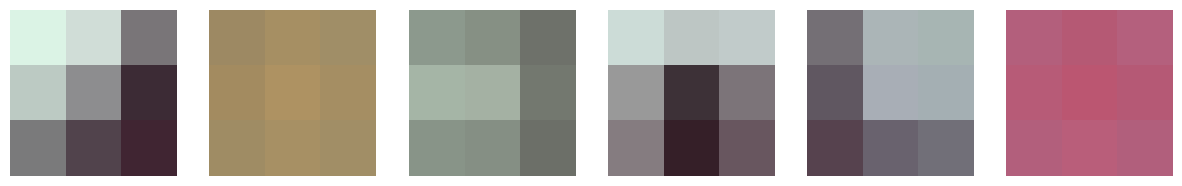

In [ ]:
# Get the first convolutional layer's weights
layer = model.layers[0]
filters = layer.get_weights()[0]  # Only take the filter weights

# Normalize the filters for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Visualize the first 6 filters
fig, axes = plt.subplots(1, 6, figsize=(15, 15))
for i in range(6):
    ax = axes[i]
    ax.imshow(filters[:, :, :, i], cmap='gray')
    ax.axis('off')
plt.show()


To Improve Model Generalization

Data augmentation creates modified versions of training images by applying transformations like rotation, zoom, and flip. This helps the model generalize better to unseen data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(x_train)

# Train the model with augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 4:32 174ms/step - accuracy: 0.4375 - loss: 1.4111

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4665 - loss: 1.5349 - val_accuracy: 0.5583 - val_loss: 1.2722
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4800 - loss: 1.4853 - val_accuracy: 0.5538 - val_loss: 1.2842
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.4897 - loss: 1.4596 - val_accuracy: 0.5498 - val_loss: 1.2880
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4938 - loss: 1.4447 - val_accuracy: 0.5502 - val_loss: 1.2833
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4945 - loss: 1.4427 - val_accuracy: 0.5369 - val_loss: 1.3168
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.4959 - loss: 1.4445 - val_accuracy: 0.5479 - val_loss: 1.2950
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.4966 - loss: 1.4350 - val_accuracy: 0.5386 - val_loss: 1.3132
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.4991 - loss: 1.44

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5375 - loss: 1.3076
Test accuracy: 0.5415999889373779


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5047 - loss: 1.4238 - val_accuracy: 0.5433 - val_loss: 1.3008
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.5041 - loss: 1.4299 - val_accuracy: 0.5481 - val_loss: 1.2883
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4932 - loss: 1.4523 - val_accuracy: 0.5263 - val_loss: 1.3374
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5003 - loss: 1.4288 - val_accuracy: 0.5402 - val_loss: 1.3100
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5041 - loss: 1.4242 - val_accuracy: 0.5430 - val_loss: 1.3019
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5018 - loss: 1.4276 - val_accuracy: 0.5430 - val_loss: 1.2958
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.4992 - loss: 1.4282 - val_accuracy: 0.5406 - val_loss: 1.3051
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5054 -

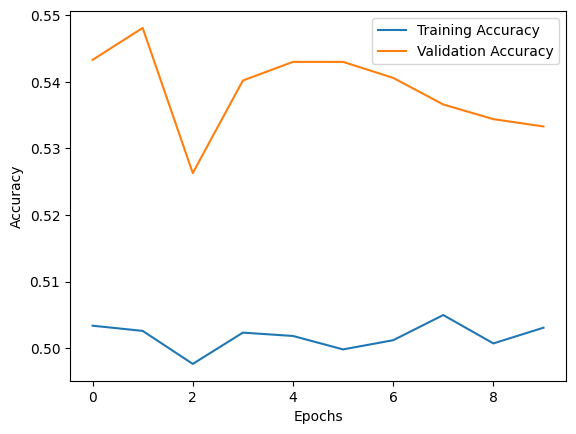

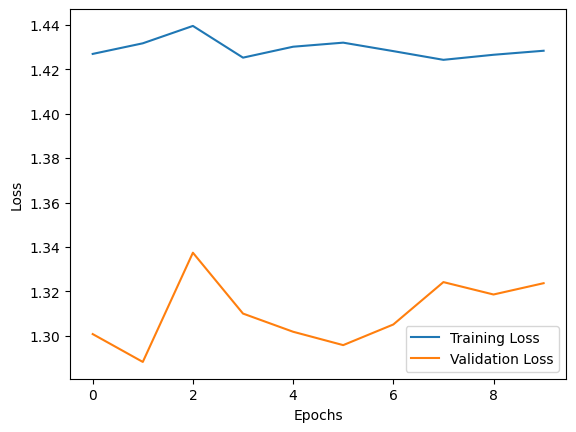

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
